# Primer examen parcial

## 1.Introduccion



En la robótica manipuladora, es esencial describir con precisión la posición y orientación relativa entre los eslabones que componen un brazo robótico. Para ello, se recurre a herramientas de modelado cinemático, como las matrices de transformación homogénea, las cuales permiten representar simultáneamente la rotación y traslación entre diferentes sistemas de coordenadas.

En este contexto, se define una función simbólica `T_ij`, que genera una matriz de transformación homogénea de `4×4`, la cual describe la postura del sistema de coordenadas *i* con respecto al sistema *j*. Esta matriz se construye utilizando componentes de traslación `x_ij`, `y_ij`, `z_ij`, y ángulos de Euler `γ_j`, `β_j` y `α_j`, correspondientes a rotaciones sucesivas sobre los ejes Z, Y y X, respectivamente.

La matriz resultante permite encapsular tanto la rotación compuesta, basada en la convención Z–Y–X, como el desplazamiento relativo entre eslabones. Esta representación es fundamental para modelar cadenas cinemáticas en sistemas robóticos, ya que permite encadenar múltiples transformaciones mediante productos matriciales, facilitando el análisis y control del movimiento del robot.





### Figura 1. Matriz de transformación homogénea

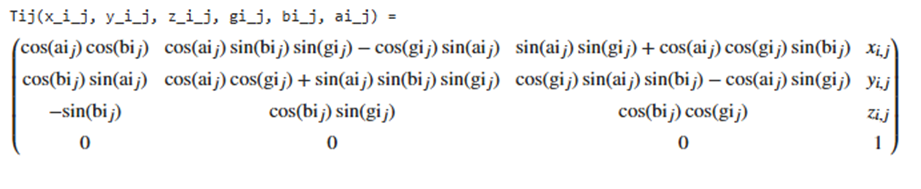

Este esquema representa la matriz homogénea \( T_{ij} \), utilizada para describir la postura relativa entre dos eslabones del robot.


## 2.1 Modelado Cinemático Directo de la Postura

Para modelar la cinemática directa de este robot manipulador, se empleó la multiplicación secuencial de matrices de transformación homogénea que describen la relación espacial entre eslabones consecutivos. Cada una de estas matrices representa una transformación que incluye rotación y traslación, permitiendo expresar la postura de un sistema de coordenadas con respecto a otro.

En este caso, la arquitectura del robot se representa mediante cuatro matrices `T`, que codifican las transformaciones entre los distintos marcos de referencia asociados a cada eslabón. Al multiplicar estas matrices de forma encadenada, se obtiene la matriz total que relaciona el sistema base con el efector final, describiendo completamente la posición y orientación del extremo del robot en el espacio.


### Figura 3. Modelo cinemático de un manipulador planar de 3 GDL

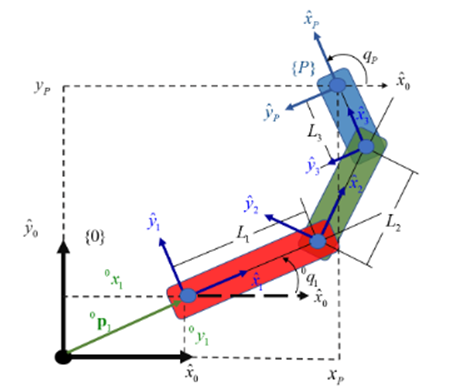


* La matriz de transformación homogénea `T_0_1` describe la postura del eslabón 1 con respecto al sistema base. Se compone de una rotación en el plano XY y una traslación 2D. Su forma es la siguiente:

\[
T_{0,1} =
\begin{bmatrix}
\cos(\theta_{0,1}) & -\sin(\theta_{0,1}) & 0 & x_{0,1} \\
\sin(\theta_{0,1}) & \cos(\theta_{0,1}) & 0 & y_{0,1} \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\]

Esta matriz forma parte del encadenamiento que permite calcular la postura completa del robot mediante la multiplicación sucesiva de transformaciones entre eslabones.


* Análisis Completo de la Matriz de Transformación Homogénea T<sub>1,2</sub>

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; margin-bottom: 15px;">


$$
T_{1,2} = \begin{bmatrix} 
\cos(\theta_{1,2}) & -\sin(\theta_{1,2}) & 0 & L_1 \\ 
\sin(\theta_{1,2}) & \cos(\theta_{1,2}) & 0 & 0 \\ 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 
\end{bmatrix}
$$
</div>

T_12: Corresponde a una rotación θ_12 alrededor del eje Z, y una traslación a lo largo del eje x de magnitud L_1.

```python
R = [
    [np.cos(θ), -np.sin(θ), 0],
    [np.sin(θ),  np.cos(θ), 0],
    [0,          0,         1]
])




* Observación sobre T<sub>23</sub>



$$
T_{23} = \begin{bmatrix} 
\cosθ_{23} & -\sinθ_{23} & 0 & L_2 \\ 
\sinθ_{23} & \cosθ_{23} & 0 & 0 \\ 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 
\end{bmatrix}
$$

**Interpretación**: Esta matriz representa:
1. Una rotación de θ<sub>23</sub> radianes alrededor del eje Z
2. Una traslación de L<sub>2</sub> unidades en el eje X

Es idéntica en estructura a T<sub>12</sub> pero aplicada al siguiente eslabón de la cadena cinemática.

Análisis de la Matriz de Transformación T<sub>3P</sub>

## Observación Principal

La matriz T<sub>3P</sub> representa una **traslación pura** de L<sub>3</sub> unidades a lo largo del eje X, sin ninguna rotación:

$$
T_{3P} = \begin{pmatrix} 
1 & 0 & 0 & L_3 \\ 
0 & 1 & 0 & 0 \\ 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 
\end{pmatrix}
$$

## Características Clave:

1. **Matriz identidad modificada**: Solo contiene términos de traslación (última columna)
2. **Ausencia de rotación**: La submatriz 3×3 superior izquierda es la matriz identidad
3. **Efecto físico**: Desplaza el sistema de coordenadas del efector final (P) respecto al eslabón 3

## 2.2 Cálculo de la Transformación Total


### Estructura Matemática
La matriz de transformación completa desde la base (O) hasta el efector final (P) es:

$$
T_{0P} = \begin{pmatrix} 
\sigma_2 & -\sigma_1 & 0 & P_x \\ 
\sigma_1 & \sigma_2 & 0 & P_y \\ 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 
\end{pmatrix}
$$

Donde:
- $\sigma_1 = \sin(\theta_{0,1} + \theta_{1,2} + \theta_{2,3})$
- $\sigma_2 = \cos(\theta_{0,1} + \theta_{1,2} + \theta_{2,3})$
- $P_x = x_{0,1} + L_1\cos\theta_{0,1} + L_2\cos(\theta_{0,1}+\theta_{1,2}) + L_3\sigma_2$
- $P_y = y_{0,1} + L_1\sin\theta_{0,1} + L_2\sin(\theta_{0,1}+\theta_{1,2}) + L_3\sigma_1$

## Interpretación Geométrica

### 1. Componente de Rotación
```python
R = np.array([
    [sigma2, -sigma1, 0],
    [sigma1,  sigma2, 0],
    [0,      0,      1]
])
```

Representa la orientación acumulada del efector final, combinando los tres ángulos articulares.
 ```python
d = np.array([P_x, P_y, 0])
```

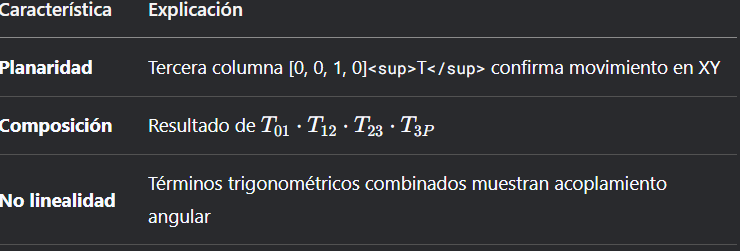

## 2.3 Vector de postura del robot

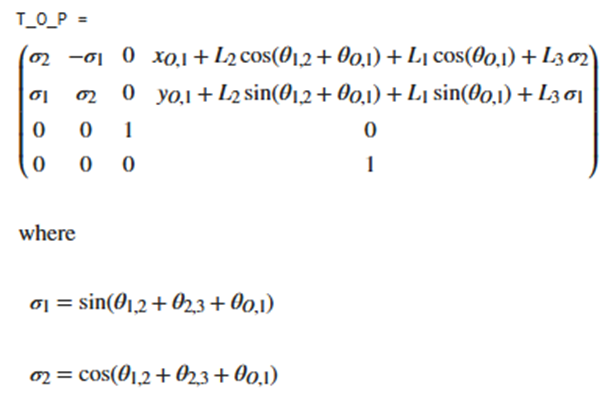

## 1. Descomposición del Vector de Postura
El vector ξ<sub>OP</sub> representa la configuración final del efector:

$$
ξ_{OP} = \begin{cases}
x = x_{0,1} + L_1\cosθ_{0,1} + L_2\cos(θ_{0,1}+θ_{1,2}) + L_3\cos(θ_{sum}) \\
y = y_{0,1} + L_1\sinθ_{0,1} + L_2\sin(θ_{0,1}+θ_{1,2}) + L_3\sin(θ_{sum}) \\
\phi = θ_{0,1} + θ_{1,2} + θ_{2,3}
\end{cases}
$$

Donde $θ_{sum} = θ_{0,1} + θ_{1,2} + θ_{2,3}$

### Interpretación Física:
- **Componente x**: 
  ```python 
  x_efector = x_base + proyecciones_x(L1, L2, L3)

Componente y:

```python
y_efector = y_base + proyecciones_y(L1, L2, L3)

```

Orientación ϕ: Suma algebraica de ángulos articulares

2.1 Suposiciones Clave
Origen en (0,0) → 
x
0
,
1
=
y
0
,
1
=
0
x 
0,1
​
 =y 
0,1
​
 =0

Movimiento restringido al plano XY

Configuración no redundante

2.2 Algoritmo de Solución

```python

import numpy as np

def inverse_kinematics(xd, yd, φd, L1, L2):
    # Paso 1: Distancia radial
    r = np.sqrt(xd**2 + yd**2)
    
    # Paso 2: Cálculo θ2 (ley de cosenos)
    cos_θ2 = (r**2 - L1**2 - L2**2)/(2*L1*L2)
    θ2 = np.arccos(np.clip(cos_θ2, -1, 1))  # Evitar errores numéricos
    
    # Paso 3: Cálculo θ1
    α = np.arctan2(yd, xd)
    β = np.arctan2(L2*np.sin(θ2), L1 + L2*np.cos(θ2))
    θ1 = α - β
    
    # Paso 4: Cálculo θ3
    θ3 = φd - θ1 - θ2
    
    return θ1, θ2, θ3


```


# Cinemática Inversa para Robot SCARA de 3 GDL

## Objetivo
La cinemática inversa permite calcular los ángulos articulares ($θ_1$, $θ_2$, $θ_3$) necesarios para posicionar el efector final en coordenadas cartesianas deseadas ($x_d$, $y_d$) con orientación $φ_d$, asumiendo:
- Origen en (0,0)
- Movimiento restringido al plano XY
- Configuración no redundante

## Metodología de Solución

### 1. Cálculo de Distancia Radial
Primero se determina la distancia euclidiana desde el origen hasta la posición deseada:

```python
r = np.sqrt(x_d**2 + y_d**2)  # Distancia al objetivo

## 2. Solución para θ₂ (Ley de Cosenos)

**Fórmula fundamental:**  
$$
θ_2 = \arccos\left(\frac{r^2 - L_1^2 - L_2^2}{2L_1L_2}\right)
$$

**Implementación numérica:**
```python
cos_θ2 = (r**2 - L1**2 - L2**2)/(2*L1*L2)
θ2 = np.arccos(np.clip(cos_θ2, -1, 1))  # Prevención de errores numéricos

## 3. Solución para θ1

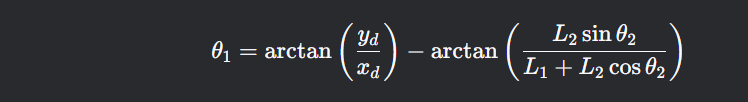


```python
α = np.arctan2(y_d, x_d)  # Ángulo global al objetivo
β = np.arctan2(L2*np.sin(θ2), L1 + L2*np.cos(θ2))  # Ángulo de compensación
θ1 = α - β  # Solución primaria
```

# 3. Modelado Cinemático de las Velocidades

## 3.1 Cinemática Directa de las Velocidades

### Concepto Fundamental
El modelo de velocidades relaciona las velocidades articulares con las velocidades del efector final mediante **la matriz Jacobiana**:

$$
\dot{\xi}_0^P = J(\theta) \cdot \dot{\theta}
$$

Donde:
- $\dot{\xi}_0^P = \begin{bmatrix} v_x \\ v_y \\ \omega \end{bmatrix}$: Vector de velocidades del efector (lineales y angular)
- $J(\theta)$: Matriz Jacobiana (3×3 para robots planares)
- $\dot{\theta} = \begin{bmatrix} \dot{\theta}_1 \\ \dot{\theta}_2 \\ \dot{\theta}_3 \end{bmatrix}$: Velocidades articulares

---

### Cálculo del Jacobiano
#### Método Analítico
El Jacobiano se obtiene derivando el vector de postura respecto a los ángulos articulares:

$$
J(\theta) = \frac{\partial \xi_0^P}{\partial \theta} = \begin{bmatrix} 
\frac{\partial x_P}{\partial \theta_1} & \frac{\partial x_P}{\partial \theta_2} & \frac{\partial x_P}{\partial \theta_3} \\ 
\frac{\partial y_P}{\partial \theta_1} & \frac{\partial y_P}{\partial \theta_2} & \frac{\partial y_P}{\partial \theta_3} \\ 
\frac{\partial \phi}{\partial \theta_1} & \frac{\partial \phi}{\partial \theta_2} & \frac{\partial \phi}{\partial \theta_3} 
\end{bmatrix}
$$

#### Implementación en SymPy
```python
import sympy as sp

# Definición de variables simbólicas
x_0_1, y_0_1, theta_0_1, L_1, L_2, theta_1_2, L_3, theta_2_3 = sp.symbols(
    'x_0_1 y_0_1 theta_0_1 L_1 L_2 theta_1_2 L_3 theta_2_3'
)

# Vector de postura (ejemplo simplificado)
xi_0_P = sp.Matrix([
    x_0_1 + L_1*sp.cos(theta_0_1) + L_2*sp.cos(theta_0_1 + theta_1_2) + L_3*sp.cos(theta_0_1 + theta_1_2 + theta_2_3),
    y_0_1 + L_1*sp.sin(theta_0_1) + L_2*sp.sin(theta_0_1 + theta_1_2) + L_3*sp.sin(theta_0_1 + theta_1_2 + theta_2_3),
    theta_0_1 + theta_1_2 + theta_2_3
])

# Cálculo del Jacobiano
J_theta = xi_0_P.jacobian([theta_0_1, theta_1_2, theta_2_3])

# Mostrar resultado
sp.simplify(J_theta)

# 3.2 Cinemática Inversa de las Velocidades

## Concepto Fundamental
La relación inversa entre velocidades del efector y velocidades articulares se obtiene mediante la **matriz Jacobiana inversa**:

$$
\dot{\theta} = J^{-1}(\theta) \cdot \dot{\xi}_0^P
$$

Donde:
- $\dot{\theta} = \begin{bmatrix} \dot{\theta}_1 \\ \dot{\theta}_2 \\ \dot{\theta}_3 \end{bmatrix}$: Vector de velocidades articulares (rad/s)
- $\dot{\xi}_0^P = \begin{bmatrix} v_x \\ v_y \\ \omega \end{bmatrix}$: Velocidades cartesianas deseadas

## Implementación Computacional

### En Python
```python
from sympy import Matrix, simplify

# Cálculo de la inversa
J_inv = J_theta.inv()

# Simplificación simbólica
J_inv = simplify(J_inv)

# 4. Modelado Cinemático de las Aceleraciones para Robots SCARA

## 4.1 Modelo Cinemático Directo de Aceleraciones

### Ecuación Fundamental
La aceleración del efector se calcula como:

$$
\ddot{\xi} = J(\theta)\ddot{\theta} + \dot{J}(\theta, \dot{\theta})\dot{\theta}
$$

Donde:
- $J(\theta)$: Matriz Jacobiana
- $\dot{J}(\theta, \dot{\theta})$: Derivada temporal del Jacobiano
- $\ddot{\theta}$: Vector de aceleraciones articulares

### Implementación en Python/SymPy
```python
import sympy as sp
from sympy import diff, Matrix, simplify

# 1. Definición de variables simbólicas
theta_01, theta_12, theta_23 = sp.symbols('theta_01 theta_12 theta_23')
theta_d01, theta_d12, theta_d23 = sp.symbols('theta_d01 theta_d12 theta_d23')
theta_dd01, theta_dd12, theta_dd23 = sp.symbols('theta_dd01 theta_dd12 theta_dd23')
x_01, y_01, L1, L2, L3 = sp.symbols('x_01 y_01 L1 L2 L3')

# 2. Vector de postura (posición + orientación)
xi_0_P = Matrix([
    x_01 + L1*sp.cos(theta_01) + L2*sp.cos(theta_01 + theta_12) + L3*sp.cos(theta_01 + theta_12 + theta_23),
    y_01 + L1*sp.sin(theta_01) + L2*sp.sin(theta_01 + theta_12) + L3*sp.sin(theta_01 + theta_12 + theta_23),
    theta_01 + theta_12 + theta_23
])

# 3. Cálculo del Jacobiano
J = xi_0_P.jacobian([theta_01, theta_12, theta_23])

# 4. Derivada temporal del Jacobiano (J_dot)
theta_dot = Matrix([theta_d01, theta_d12, theta_d23])
J_dot = sum(diff(J, theta)*theta_d for theta, theta_d in zip([theta_01, theta_12, theta_23], theta_dot))

# 5. Modelo completo de aceleraciones
theta_ddot = Matrix([theta_dd01, theta_dd12, theta_dd23])
xi_ddot = J*theta_ddot + J_dot*theta_dot

# Mostrar resultados
print("Jacobiano J:")
sp.pretty_print(J)
print("\nDerivada del Jacobiano J_dot:")
sp.pretty_print(J_dot)
print("\nModelo de aceleraciones xi_ddot:")
sp.pretty_print(simplify(xi_ddot))

```python

import numpy as np

def compute_joint_accelerations(theta, theta_dot, xi_ddot, L):
    """
    Calcula las aceleraciones articulares necesarias
    
    Parámetros:
    theta: Vector de ángulos actuales [θ1, θ2, θ3]
    theta_dot: Vector de velocidades articulares [θ1_dot, θ2_dot, θ3_dot]
    xi_ddot: Vector de aceleración deseada del efector [x_ddot, y_ddot, omega_ddot]
    L: Longitudes de eslabones [L1, L2, L3]
    """
    # Conversión a matrices numpy
    theta = np.array(theta)
    theta_dot = np.array(theta_dot)
    xi_ddot = np.array(xi_ddot)
    
    # Cálculo numérico del Jacobiano
    J = compute_jacobian(theta, L)
    
    # Cálculo numérico de J_dot (aproximación por diferencias finitas)
    epsilon = 1e-6
    J_plus = compute_jacobian(theta + epsilon*theta_dot, L)
    J_minus = compute_jacobian(theta - epsilon*theta_dot, L)
    J_dot = (J_plus - J_minus)/(2*epsilon)
    
    # Solución del sistema
    if np.linalg.det(J) > 1e-6:  # Evitar singularidades
        theta_ddot = np.linalg.solve(J, xi_ddot - J_dot @ theta_dot)
    else:
        theta_ddot = np.linalg.pinv(J) @ (xi_ddot - J_dot @ theta_dot)
    
    return theta_ddot

def compute_jacobian(theta, L):
    """Función auxiliar para calcular el Jacobiano numéricamente"""
    θ1, θ2, θ3 = theta
    L1, L2, L3 = L
    
    J = np.array([
        [-L1*np.sin(θ1)-L2*np.sin(θ1+θ2)-L3*np.sin(θ1+θ2+θ3), -L2*np.sin(θ1+θ2)-L3*np.sin(θ1+θ2+θ3), -L3*np.sin(θ1+θ2+θ3)],
        [L1*np.cos(θ1)+L2*np.cos(θ1+θ2)+L3*np.cos(θ1+θ2+θ3), L2*np.cos(θ1+θ2)+L3*np.cos(θ1+θ2+θ3), L3*np.cos(θ1+θ2+θ3)],
        [1, 1, 1]
    ])
    return J

```

# Modelado Completo de Aceleraciones para Robots SCARA

## 1. Derivada Temporal del Jacobiano (Ẏ)

### Concepto Matemático
La derivada temporal del Jacobiano se calcula como:

$$
\dot{J} = \frac{dJ}{dt} = \sum_{i=1}^n \frac{\partial J}{\partial \theta_i} \dot{\theta_i}
$$

### Implementación en Python/SymPy
```python
import sympy as sp

# 1. Definición de variables temporales
t = sp.symbols('t')
theta_t0 = sp.Function('theta_t0')(t)
theta_t1 = sp.Function('theta_t1')(t)
theta_t2 = sp.Function('theta_t2')(t)

# 2. Jacobiano con variables temporales
J_theta_t = sp.Matrix([
    [-sp.sin(theta_t0 + theta_t1) - sp.sin(theta_t0 + theta_t1 + theta_t2), 
     -sp.sin(theta_t0 + theta_t1 + theta_t2), 
     -sp.sin(theta_t0 + theta_t1 + theta_t2)],
    [sp.cos(theta_t0 + theta_t1) + sp.cos(theta_t0 + theta_t1 + theta_t2),
     sp.cos(theta_t0 + theta_t1 + theta_t2),
     sp.cos(theta_t0 + theta_t1 + theta_t2)],
    [1, 1, 1]
])

# 3. Cálculo de J_dot
J_dot_list = []
for i in range(J_theta_t.shape[0]):
    row = []
    for j in range(J_theta_t.shape[1]):
        row.append(sp.diff(J_theta_t[i,j], t))
    J_dot_list.append(row)
J_dot = sp.Matrix(J_dot_list)

# 4. Sustitución de derivadas
theta_dot_t0, theta_dot_t1, theta_dot_t2 = sp.symbols('theta_dot_t0 theta_dot_t1 theta_dot_t2')
J_dot = J_dot.subs({
    sp.diff(theta_t0, t): theta_dot_t0,
    sp.diff(theta_t1, t): theta_dot_t1,
    sp.diff(theta_t2, t): theta_dot_t2
})

# Resultado simplificado
J_dot_simplified = sp.simplify(J_dot)

# 4Modelo Cinemático Inverso de Aceleraciones para Robots SCARA

## 1. Fundamentos Matemáticos

### Ecuación Principal
El modelo inverso de aceleraciones se obtiene resolviendo:

$$
\ddot{\theta} = J^+(\ddot{x}_d - \dot{J}\dot{\theta})
$$

Donde:
- $J^+$: Pseudoinversa del Jacobiano (Moore-Penrose)
- $\ddot{x}_d$: Aceleración cartesiana deseada
- $\dot{J}$: Derivada temporal del Jacobiano
- $\dot{\theta}$: Velocidades articulares actuales

## 2. Implementación en Python

### 2.1 Versión Simbólica (SymPy)
```python
import sympy as sp

# Definición de variables simbólicas
theta_0_1, theta_1_2, theta_2_3 = sp.symbols('theta_0_1 theta_1_2 theta_2_3')
theta_dot_0_1, theta_dot_1_2, theta_dot_2_3 = sp.symbols('theta_dot_0_1 theta_dot_1_2 theta_dot_2_3')
x_ddot_1, x_ddot_2, x_ddot_3 = sp.symbols('x_ddot_1 x_ddot_2 x_ddot_3')
L1, L2, L3 = sp.symbols('L1 L2 L3')

# Vector de aceleración deseada
x_ddot_d = sp.Matrix([x_ddot_1, x_ddot_2, x_ddot_3])

# Cálculo del Jacobiano y su derivada (ver sección anterior)
J = compute_symbolic_jacobian(theta_0_1, theta_1_2, theta_2_3, L1, L2, L3)
J_dot = compute_symbolic_jacobian_dot(theta_0_1, theta_1_2, theta_2_3, 
                                     theta_dot_0_1, theta_dot_1_2, theta_dot_2_3, 
                                     L1, L2, L3)

# Solución con pseudoinversa
theta_ddot_sol = J.pinv() * (x_ddot_d - J_dot * sp.Matrix([theta_dot_0_1, theta_dot_1_2, theta_dot_2_3]))

# Simplificación del resultado
theta_ddot_simplified = sp.simplify(theta_ddot_sol)
```

```python
def robust_inverse_acceleration(J, x_ddot_d, J_dot_theta_dot, lambda_reg=0.1):
    """
    Versión robusta usando regularización de Tikhonov
    """
    J_T = J.T
    lambda_sq = lambda_reg**2
    return J_T @ np.linalg.solve(J@J_T + lambda_sq*np.eye(J.shape[0]), 
                               x_ddot_d - J_dot_theta_dot)

```


# 5Modelado Dinámico de Robots usando Euler-Lagrange

## 1. Fundamentos Teóricos

### 1.1 Energía Cinética en Sistemas Mecánicos
Para un cuerpo rígido en un robot, la energía cinética total se compone de:

$$
K = \underbrace{\frac{1}{2}mv^Tv}_{\text{Traslación}} + \underbrace{\frac{1}{2}\omega^TI\omega}_{\text{Rotación}}
$$

Donde:
- $m$: Masa del cuerpo
- $v$: Velocidad lineal del centro de masa
- $\omega$: Velocidad angular
- $I$: Tensor de inercia

### 1.2 Ecuaciones de Euler-Lagrange
Las ecuaciones del movimiento se obtienen mediante:

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{q}}\right) - \frac{\partial L}{\partial q} = \tau
$$

Con $L = K - U$ (Lagrangiano), donde $U$ es la energía potencial.

## 2. Implementación Computacional

### 2.1 Cálculo de Velocidades

```python
import sympy as sp

# Definición de variables simbólicas
theta_0_1 = sp.symbols('theta_0_1')
theta_dot_0_1 = sp.symbols('theta_dot_0_1')
x_1_C1 = sp.symbols('x_1_C1')

# Velocidad en sistema local C1
v_C1_C1 = sp.Matrix([0, x_1_C1*theta_dot_0_1, 0])

# Velocidad en sistema global O
v_O_C1 = sp.Matrix([
    -x_1_C1*sp.sin(theta_0_1)*theta_dot_0_1,
    x_1_C1*sp.cos(theta_0_1)*theta_dot_0_1,
    0
])

### 2.2 Calculo energía cinetica

```python
# Masa e inercia del eslabón
m1, Ixx1, Iyy1, Izz1 = sp.symbols('m1 Ixx1 Iyy1 Izz1')

# Tensor de inercia (simplificado para movimiento planar)
I_C1 = sp.Matrix([
    [Ixx1, 0, 0],
    [0, Iyy1, 0],
    [0, 0, Izz1]
])

# Productos punto para energía cinética
K_translational = (m1/2)*v_O_C1.dot(v_O_C1)
K_rotational = (1/2)*sp.Matrix([0, 0, theta_dot_0_1]).dot(I_C1 @ sp.Matrix([0, 0, theta_dot_0_1]))

K_total = sp.simplify(K_translational + K_rotational)

```

# Cálculo de Posiciones de Centros de Masa para Robots SCARA

## 1. Marco Teórico

### 1.1 Transformaciones Homogéneas
La posición de centros de masa se calcula mediante matrices de transformación homogéneas:

$$
T_{0}^{Ci} = T_{0}^{1} \cdot T_{1}^{2} \cdot \ldots \cdot T_{i-1}^{i} \cdot T_{i}^{Ci}
$$

Donde cada $T_{j}^{k}$ sigue la convención Denavit-Hartenberg modificada.

## 2. Implementación Computacional

### 2.1 Definición de Matrices de Transformación
```python
import sympy as sp

# Variables simbólicas
θ01, θ12, θ23 = sp.symbols('theta_01 theta_12 theta_23')
x1, x2, x3 = sp.symbols('x_1_C1 x_2_C2 x_3_C3')

# Matriz de transformación genérica
def T_ij(x, y, z, α, β, γ):
    return sp.Matrix([
        [sp.cos(α)*sp.cos(β), sp.cos(α)*sp.sin(β)*sp.sin(γ)-sp.sin(α)*sp.cos(γ), sp.cos(α)*sp.sin(β)*sp.cos(γ)+sp.sin(α)*sp.sin(γ), x],
        [sp.sin(α)*sp.cos(β), sp.sin(α)*sp.sin(β)*sp.sin(γ)+sp.cos(α)*sp.cos(γ), sp.sin(α)*sp.sin(β)*sp.cos(γ)-sp.cos(α)*sp.sin(γ), y],
        [-sp.sin(β), sp.cos(β)*sp.sin(γ), sp.cos(β)*sp.cos(γ), z],
        [0, 0, 0, 1]
    ])

# Matrices para cada eslabón (simplificación planar)
T_01 = T_ij(0, 0, 0, 0, 0, θ01)
T_12 = T_ij(x1, 0, 0, 0, 0, θ12)
T_23 = T_ij(x2, 0, 0, 0, 0, θ23)

#Cálculo de Posiciones de Centros de Masa

# Transformaciones a centros de masa
T_0_C1 = T_01 * T_ij(x1, 0, 0, 0, 0, 0)
T_0_C2 = T_01 * T_12 * T_ij(x2, 0, 0, 0, 0, 0)
T_0_C3 = T_01 * T_12 * T_23 * T_ij(x3, 0, 0, 0, 0, 0)

# Extracción de posiciones
p_C1 = T_0_C1[:3, 3]
p_C2 = T_0_C2[:3, 3]
p_C3 = T_0_C3[:3, 3]

print("Posición C1:", p_C1)
print("Posición C2:", p_C2)
print("Posición C3:", p_C3)

# Modelado de Posiciones de Centros de Masa para Robot SCARA

## 1. Definición Matemática de Vectores de Posición

### 1.1 Vector para Centro de Masa C1
$$
\vec{p}_{C1} = \begin{bmatrix}
x_{01} + x_{1C1}\cos(\theta_{01}) \\
y_{01} + x_{1C1}\sin(\theta_{01}) \\
0
\end{bmatrix}
$$

### 1.2 Vector para Centro de Masa C2
$$
\vec{p}_{C2} = \begin{bmatrix}
x_{01} + L_1\cos(\theta_{01}) + x_{2C2}\cos(\theta_{01}+\theta_{12}) \\
y_{01} + L_1\sin(\theta_{01}) + x_{2C2}\sin(\theta_{01}+\theta_{12}) \\
0
\end{bmatrix}
$$

### 1.3 Vector para Centro de Masa C3
$$
\vec{p}_{C3} = \begin{bmatrix}
x_{01} + L_1\cos(\theta_{01}) + L_2\cos(\theta_{01}+\theta_{12}) + x_{3C3}\cos(\theta_{01}+\theta_{12}+\theta_{23}) \\
y_{01} + L_1\sin(\theta_{01}) + L_2\sin(\theta_{01}+\theta_{12}) + x_{3C3}\sin(\theta_{01}+\theta_{12}+\theta_{23}) \\
0
\end{bmatrix}
$$

## 2. Implementación en SymPy

```python
import sympy as sp

# Definición de variables simbólicas
x_01, y_01 = sp.symbols('x_01 y_01')
x_1C1, x_2C2, x_3C3 = sp.symbols('x_1C1 x_2C2 x_3C3')
L1, L2 = sp.symbols('L1 L2')
theta_01, theta_12, theta_23 = sp.symbols('theta_01 theta_12 theta_23')

# Vectores de posición
p_0_C1 = sp.Matrix([
    x_01 + x_1C1*sp.cos(theta_01),
    y_01 + x_1C1*sp.sin(theta_01),
    0
])

p_0_C2 = sp.Matrix([
    x_01 + L1*sp.cos(theta_01) + x_2C2*sp.cos(theta_01 + theta_12),
    y_01 + L1*sp.sin(theta_01) + x_2C2*sp.sin(theta_01 + theta_12),
    0
])

p_0_C3 = sp.Matrix([
    x_01 + L1*sp.cos(theta_01) + L2*sp.cos(theta_01 + theta_12) + x_3C3*sp.cos(theta_01 + theta_12 + theta_23),
    y_01 + L1*sp.sin(theta_01) + L2*sp.sin(theta_01 + theta_12) + x_3C3*sp.sin(theta_01 + theta_12 + theta_23),
    0
])

# Mostrar resultados
print("Posición C1:")
sp.pprint(p_0_C1)
print("\nPosición C2:")
sp.pprint(p_0_C2)
print("\nPosición C3:")
sp.pprint(p_0_C3)

#  5.3 Cálculo de las Velocidades en un Sistema Robótico

En este apartado, se describen los pasos para **calcular las velocidades lineales y angulares** de los centros de masa de los cuerpos de un robot. Estos cálculos son fundamentales para determinar la **energía cinética total** del sistema y, posteriormente, formular las **ecuaciones de movimiento** mediante el **formulismo de Lagrange**.

---

##  Objetivo

- Calcular las velocidades **lineales** de los centros de masa \( C_1, C_2, C_3 \).
- Determinar las velocidades **angulares** de cada cuerpo mediante matrices de transformación.
- Utilizar estos resultados para modelar la **energía cinética** y dinámica del robot.

---

##  Velocidades Lineales de los Centros de Masa

Para obtener las velocidades lineales, derivamos las posiciones de los centros de masa respecto a los ángulos articulares del sistema. Utilizamos derivadas parciales para cada articulación relevante.

###  Código en SymPy (Python)

```python
import sympy as sp

# Variables simbólicas de ángulos y velocidades angulares
theta_O_1, theta_1_2, theta_2_3 = sp.symbols('theta_O_1 theta_1_2 theta_2_3')
theta_dot_O_1, theta_dot_1_2, theta_dot_2_3 = sp.symbols('theta_dot_O_1 theta_dot_1_2 theta_dot_2_3')

# Posiciones simbólicas de los centros de masa
p_O_C1 = sp.Matrix([sp.symbols('x_C1'), sp.symbols('y_C1'), sp.symbols('z_C1')])
p_O_C2 = sp.Matrix([sp.symbols('x_C2'), sp.symbols('y_C2'), sp.symbols('z_C2')])
p_O_C3 = sp.Matrix([sp.symbols('x_C3'), sp.symbols('y_C3'), sp.symbols('z_C3')])

# Cálculo de velocidades lineales por derivación parcial
v_O_C1 = sp.diff(p_O_C1, theta_O_1) * theta_dot_O_1

v_O_C2 = (sp.diff(p_O_C2, theta_O_1) * theta_dot_O_1 +
          sp.diff(p_O_C2, theta_1_2) * theta_dot_1_2)

v_O_C3 = (sp.diff(p_O_C3, theta_O_1) * theta_dot_O_1 +
          sp.diff(p_O_C3, theta_1_2) * theta_dot_1_2 +
          sp.diff(p_O_C3, theta_2_3) * theta_dot_2_3)

# Mostrar resultados
v_O_C1, v_O_C2, v_O_C3


Cada velocidad lineal se obtiene aplicando la regla de la cadena con derivadas parciales respecto a los ángulos articulares.

La velocidad de un cuerpo depende de todas las articulaciones previas, ya que están conectadas de forma secuencial.

 Velocidades Angulares con Matrices de Rotación
La velocidad angular se calcula mediante el uso de matrices de rotación homogénea que describen la orientación de cada cuerpo respecto al sistema de coordenadas base.

```python

# Ángulo de rotación y velocidad angular
omega_1_1 = sp.symbols('omega_1_1')  # Velocidad angular del cuerpo 1

# Vector de velocidad angular inicial (nulo)
omega_0_0 = sp.Matrix([0, 0, 0])

# Eje unitario de rotación (eje z)
n_1_1 = sp.Matrix([0, 0, 1])

# Matriz de rotación R_0_1 (de base al cuerpo 1)
R_0_1 = sp.Matrix([
    [sp.cos(theta_O_1), -sp.sin(theta_O_1), 0],
    [sp.sin(theta_O_1),  sp.cos(theta_O_1), 0],
    [0, 0, 1]
])

# Transpuesta de R_0_1 = R_1_0 (para cambio de referencia)
R_1_0 = R_0_1.transpose()

# Mostrar matrices de rotación
R_0_1, R_1_0


```

## Conclusiones

